In [1]:
from skimage import filters
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
import os

MOTION

21


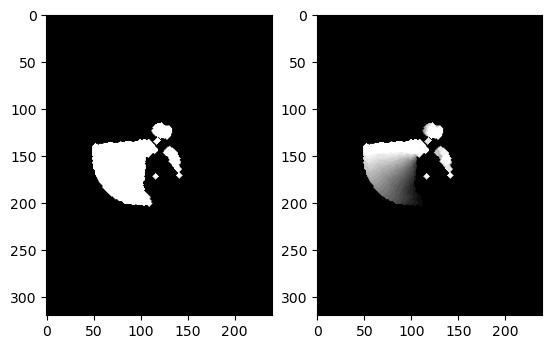

In [2]:
a1 = io.imread("HW5/aerobic-001.bmp").astype('float64')
a2 = io.imread("HW5/aerobic-002.bmp").astype('float64')
a3 = io.imread("HW5/aerobic-003.bmp").astype('float64')
a4 = io.imread("HW5/aerobic-004.bmp").astype('float64')
a5 = io.imread("HW5/aerobic-005.bmp").astype('float64')
a6 = io.imread("HW5/aerobic-006.bmp").astype('float64')
a7 = io.imread("HW5/aerobic-007.bmp").astype('float64')
a8 = io.imread("HW5/aerobic-008.bmp").astype('float64')
a9 = io.imread("HW5/aerobic-009.bmp").astype('float64')
a10 = io.imread("HW5/aerobic-010.bmp").astype('float64')
a11 = io.imread("HW5/aerobic-011.bmp").astype('float64')
a12 = io.imread("HW5/aerobic-012.bmp").astype('float64')
a13 = io.imread("HW5/aerobic-013.bmp").astype('float64')
a14 = io.imread("HW5/aerobic-014.bmp").astype('float64')
a15 = io.imread("HW5/aerobic-015.bmp").astype('float64')
a16 = io.imread("HW5/aerobic-016.bmp").astype('float64')
a17 = io.imread("HW5/aerobic-017.bmp").astype('float64')
a18 = io.imread("HW5/aerobic-018.bmp").astype('float64')
a19 = io.imread("HW5/aerobic-019.bmp").astype('float64')
a20 = io.imread("HW5/aerobic-020.bmp").astype('float64')
a21 = io.imread("HW5/aerobic-021.bmp").astype('float64')
a22 = io.imread("HW5/aerobic-022.bmp").astype('float64')
images = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22]

def simple(i1, i2, t):
    #print(np.shape(i1))
    delta = np.copy(i1)
    for x in range(np.shape(i1)[1]):
        for y in range(np.shape(i1)[0]):
            if np.abs(i2[y, x] - i1[y, x]) >= t:
                delta[y, x] = 1
            else:
                delta[y, x] = 0
    return delta

difs = []
for i in range(0, 21):
    temp = simple(images[i], images[i+1], 5)
    temp = filters.median(temp)
    temp = scipy.ndimage.binary_opening(temp, iterations=3)
    difs.append(temp)
print(len(difs))

MEI = np.zeros(np.shape(a1))
MHI = np.zeros(np.shape(a1))
for i in range(len(difs)):
    for x in range(np.shape(a1)[1]):
        for y in range(np.shape(a1)[0]):
            if difs[i][y, x] == 1:
                MHI[y, x] = i + 2
                MEI[y, x] = 1
                

for x in range(np.shape(a1)[1]):
    for y in range(np.shape(a1)[0]):
        if MHI[y, x] != 0:
            i = MHI[y, x]
            MHI[y, x] = np.max([0.0, (i-1.0)/21.0])

plt.subplot(1,2,1)
plt.imshow(MEI, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(MHI, cmap="gray")
plt.show()

Edge Detection

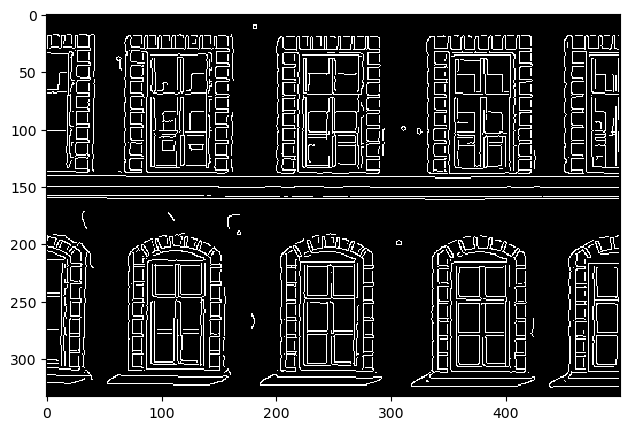

In [3]:
Im = io.imread('windows.webp')
Im = skimage.color.rgb2gray(Im)
cannyIm = skimage.feature.canny(Im, sigma=1)
io.imshow(cannyIm)

ALL ORIGINAL

In [4]:
def split_video(filename):
    path = os.path.join(os.getcwd(), filename)
    frames = []
    write_path = path[:-4] + "_edited" + path[-4:]
    cap = cv2.VideoCapture(path)
    ret = True
    while ret:
        ret, img = cap.read()  # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frames.append(img)
    video = np.stack(frames, axis=0)  # dimensions (T, H, W, C)
    # print(f"Number of Frames: {len(video)}")
    # print(f"Each frame is size: {video.shape[1:3]}")
    return video

In [5]:
def morph(video, scale):
    # dir = "seq"
    # files = [os.path.join(dir, f) for f in os.listdir(dir)] #if f.endswith('.jpg') or f.endswith('.jpeg')]
    # files = sorted(files)

    # backup = files.copy()

    #scale = 0.25

    vid = np.zeros((np.shape(video)[0], int(np.shape(video)[1]*scale), int(np.shape(video)[2]*scale)))
    #print(np.shape(vid[:, :, 0]))
    for i in range(np.shape(video)[0]):
        temp = video[i, :, :]
        temp = skimage.color.rgb2gray(temp)
        temp = skimage.transform.rescale(temp, scale, anti_aliasing=True)
        vid[i, :, :] = temp
    return vid

MOTION

In [44]:
def simple(i1, i2, t):
    #print(np.shape(i1))
    delta = np.copy(i1)
    for x in range(np.shape(i1)[1]):
        for y in range(np.shape(i1)[0]):
            if np.abs(i2[y, x] - i1[y, x]) >= t:
                delta[y, x] = 1
            else:
                delta[y, x] = 0
    return delta

def gen(images, t):
    difs = []
    for i in range(np.shape(images)[0] - 1):
        temp = simple(images[i, :, :], images[i+1, :, :], t)
        temp = filters.median(temp)
        temp = scipy.ndimage.binary_opening(temp, iterations=3)
        difs.append(temp)
    #print(len(difs))
    #print(np.shape(images[0, :, :]))
    MEI = np.zeros(np.shape(images[0, :, :]))
    MHI = np.zeros(np.shape(images[0, :, :]))
    for i in range(len(difs)):
        for x in range(np.shape(images[0, :, :])[1]):
            for y in range(np.shape(images[0, :, :])[0]):
                if difs[i][y, x] == 1:
                    MHI[y, x] = i + 2
                    MEI[y, x] = 1
                    

    for x in range(np.shape(images[0, :, :])[1]):
        for y in range(np.shape(images[0, :, :])[0]):
            if MHI[y, x] != 0:
                i = MHI[y, x]
                MHI[y, x] = np.max([0.0, (i-1.0)/fps])
    return MEI, MHI


In [1]:
def make_motion(video, fps, t):
    MEIs = []
    MHIs = []
    #fps = 30
    start = 0
    if fps == 60:
        fps = 15
    end = np.shape(video)[0] / fps
    #print(np.shape(video))
    #print(np.shape(video[start:start+fps, :, :]))
    for i in range(int(end)):
        MEI, MHI = gen(video[start:start+fps, :, :], t)
        #print(start, end)
        MEIs.append(MEI)
        MHIs.append(MHI)
        start += fps
    return MEIs, MHIs



In [8]:
def check_motion(MEIs, thresh):
    #thresh = 3000
    checks = []
    for i in range(len(MEIs)):
        if MEIs[i].sum() > thresh:
            checks.append(1)
        else:
            checks.append(0)
    return checks

EDGE

cannyIm = skimage.feature.canny(Im, sigma=1)

In [9]:
# def extract_edges(vid, scale):
#     #temp = np.copy(vid)

#     edges = np.zeros((np.shape(vid)[0], np.shape(vid)[1] * int(1/0.25), np.shape(vid)[2] * int(1/0.25)))
#     for i in range(np.shape(vid)[0]):
#         temp = vid[i, :, :]
#         temp = skimage.transform.rescale(temp, 1 / scale, anti_aliasing=True)
#         edges[i, :, :] = skimage.feature.canny(temp, sigma=6)
#     return edges


In [10]:
def stitch_video(video, fps):
    # let `video` be an array with dimensionality (T, H, W, C)
    num_frames, height, width, _ = video.shape
    #height, width, frames = np.shape(edges)
    filename = "test_out_RGB.mp4"
    codec_id = "mp4v"  # ID for a video codec.
    fourcc = cv2.VideoWriter_fourcc(*codec_id)
    out = cv2.VideoWriter(filename, fourcc=fourcc, fps=fps, frameSize=(width, height), isColor=True)

    for frame in video:
        bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(bgr_frame)
    # Release the video writer object
    out.release()

In [11]:
# video = split_video("training_videos/first.mp4")
# fps = 30
# scale = 0.25
# threshold = 3000
# vid = morph(video, scale)
# MEIs, MHIs = make_motion(vid, fps)
# checks = check_motion(MEIs, threshold)
# print(checks)
# stitch_video(video, fps)

In [12]:
# print(np.shape(video))

In [13]:
# edges = extract_edges(vid, scale)
# io.imshow(edges[632])

In [14]:
# indices = np.where(edges[632] != [0])
# coordinates = zip(indices[0], indices[1])
# print(np.shape(indices))

In [15]:

# test = video[632]
# for i in range(0, np.shape(indices)[1], 20):
#     cv2.circle(test, (indices[1][i], indices[0][i]), 10, (255, 255, 255), -1)

In [16]:
# io.imshow(test)

In [17]:
# test = video[632]
# for i in range(0, np.shape(indices)[1], 20):
#     cv2.circle(test, (indices[1][i], indices[0][i] - 300), 10, (255, 255, 255), -1)
# io.imshow(test)

In [18]:
class Steam:
    def __init__(self, img):
        img = skimage.color.rgb2gray(img)
        edges = skimage.feature.canny(img, sigma=6)
        points = np.where(edges != [0])
        self.x = np.array(points[1])
        self.y = np.array(points[0])
        self.age = 0
    
    def get_points(self):
        return self.x, self.y

    def update_points(self):
        self.y -= 50
        self.age += 1

In [19]:
# #steam = np.zeros((fps, np.shape(indices)[0], np.shape(indices)[1]))
# steam = {}
# for i in range(len(checks)):
#     if checks[i] == 1:
#         start = i * fps
#         end = start + fps
#         for j in range(start, end):
#             key = j
#             val = Steam(video[j])
#             steam[key] = val
# print(steam)
       


In [20]:
def draw_steam(steam, frame):
    keys = list(steam.keys())
    vals = list(steam.values())
    #overlay = frame.copy()
    for i in range(len(vals)):
        if vals[i].age > fps / 4:
            del steam[keys[i]]
        else:
            xs, ys = vals[i].get_points()
            #overlay = frame.copy()
            for j in range(0, np.shape(xs)[0], 100):
                cv2.circle(frame, (xs[j], ys[j]), 6, (211, 211, 211), -1)
            
            vals[i].update_points()
    return frame, steam

In [62]:
video = split_video("training_videos/sahil.mp4")
fps = 60
scale = 0.25
vid = morph(video, scale)


In [2]:
t = 0.3
MEIs, MHIs = make_motion(vid, fps, t)


NameError: name 'vid' is not defined

In [83]:
threshold = 150

checks = check_motion(MEIs, threshold)
print(checks)

[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]


In [84]:
steam = {}
fps = 15
for i in range(np.shape(video)[0]):
    #print(i, int(i / fps))
    
    if int(i / fps) < len(checks) and checks[int(i / fps)] == 1:
        key = i
        val = Steam(video[i])
        steam[key] = val
    overlay = video[i].copy()
    overlay, steam = draw_steam(steam, overlay)
    alpha = 0.5
    video[i] = cv2.addWeighted(overlay, alpha, video[i], 1 - alpha, 0.0)
    #print(len(steam.keys()))

In [85]:
fps = 60
stitch_video(video, fps)

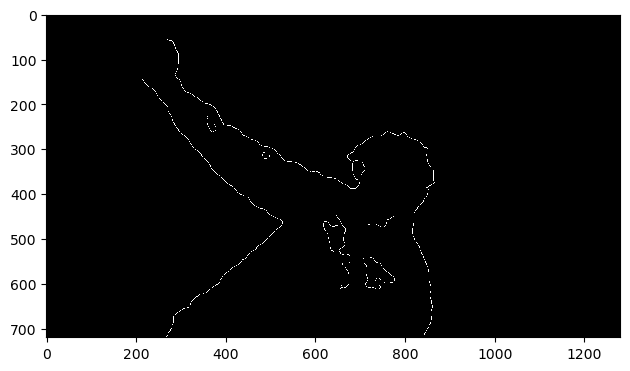

In [111]:
img = video[70]
img = skimage.color.rgb2gray(img)
edges = skimage.feature.canny(img, sigma=6)
io.imshow(edges)

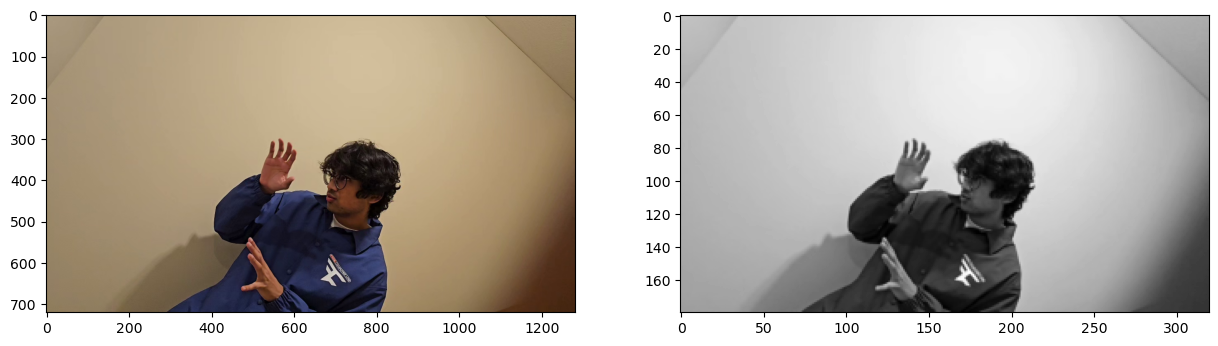

In [93]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(video[0])
plt.subplot(1,2,2)
plt.imshow(vid[0], cmap='grey')

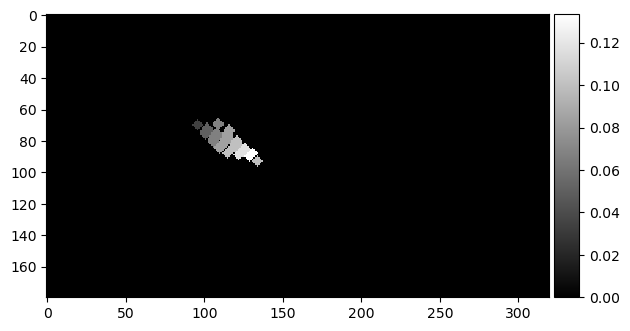

In [102]:
io.imshow(MHIs[4], cmap='grey')